# Coherence of HD20794

### Important Note

Change the path in <tt>sys.path.insert()</tt> to wherever the NWelch source code resides on your machine.

Coherence made for RV & H$\alpha$.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

import sys
sys.path.insert(0, '/Users/andrewandmatthewfonseca/NWelch/src/')

import TimeSeries
import Bivariate as Bi

### Fonts and Sizes

Here we keep variables to have consistent fonts and plot sizes throughout this analysis. 

In [28]:
# Fonts and Sizes
title_font = 18
label_font = 14
text_font = 12
figsize = (9, 5)

### HD20794 Dataset

The data table for HD20794's star activity indicators reported by <a href="https://www.aanda.org/articles/aa/pdf/2017/09/aa30406-17.pdf">Feng et al. (2017)</a>.

In [29]:
data = pd.read_csv('HD20794_HARPS_Feng17.txt', delim_whitespace=True, comment='#')
data

,RJD,RV,e_RV,BIS,FWHM,Halpha,logR'(HK),NaD1,NaD2,3AP2-1,...,6AP5-4,6AP6-5,9AP2-1,9AP3-2,9AP4-3,9AP5-4,9AP6-5,9AP7-6,9AP8-7,9AP9-8
0,53571.92932,-3.54130,0.38257,-41.67402,6.38962,0.16833,0.96511,0.70038,0.49035,3.39352,...,3.07913,2.13056,-2.25731,1.68105,3.70944,-0.20450,-2.26730,3.35641,0.65005,3.58131
1,53571.93408,-3.76917,0.41364,-41.01080,6.39146,0.16774,0.96602,0.70225,0.49138,1.93219,...,-1.04907,4.48251,0.41171,0.28990,1.32489,1.54338,-1.77583,-1.45835,5.15898,0.83355
2,53571.93854,-4.43531,0.39294,-41.18059,6.39094,0.16735,0.96642,0.70151,0.49181,3.67808,...,1.12875,5.23736,0.97792,2.41222,1.78039,0.96703,0.16103,0.01386,3.54310,5.73817
3,53571.94239,-4.86209,0.38001,-41.47111,6.38986,0.16692,0.96633,0.70080,0.49251,2.91127,...,-1.31392,6.16297,-1.26338,2.31786,0.67180,1.91097,0.44848,-2.04767,3.62819,4.24236
4,53571.94634,-3.12528,0.39686,-41.93214,6.38907,0.16795,0.96531,0.70026,0.49187,3.87870,...,3.14394,1.74174,-1.16608,-0.18713,4.04659,0.47915,-0.73155,2.66149,-0.43096,4.67923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,56538.88169,-3.33677,0.32452,-42.40044,6.40951,0.16493,0.96819,0.70184,0.49811,3.37944,...,-0.35830,5.62643,6.20488,-0.68742,3.68681,0.56467,-3.11838,0.73634,1.88982,4.33900
4879,56564.76211,-3.41550,0.28242,-43.30241,6.41245,0.16540,0.96833,0.70314,0.49066,-0.30794,...,3.41633,0.55355,0.57263,0.43058,-0.01826,-1.58113,1.41791,2.73226,-3.13380,7.01151
4880,56564.76479,-3.97736,0.27438,-42.41135,6.41290,0.16586,0.96900,0.70201,0.48989,0.18912,...,2.42535,-0.96201,2.17649,0.47312,-0.44202,-0.48194,1.35256,1.89994,-3.40059,4.64229
4881,56564.76738,-3.53729,0.29427,-40.30742,6.41489,0.16642,0.96906,0.70254,0.49128,0.87593,...,0.46555,1.34238,3.76880,-1.86315,0.74373,0.07357,1.38032,-0.28740,0.36095,2.30413


### Stellar signals

These are variables holding the periods for a number of planets, with some being possible signals for planets. Specifically, planets c, f, and g are possible planet signals. These are found in the paper linked above.

In [34]:
# Stellar signals
pb = 18.33 # planet b
pc = 43.17 # planet c (possible)
pd = 88.90 # planet d
pe = 147.02 # planet e
pf = 331.41 # planet f (possible)
pg = 11.86 # planet g (possible)

<font size=10><p style="text-align:center"> RV & H$\alpha$ </font></p>

## RV & H$\alpha$ TimeSeries Objects

Creating TimeSeries objects and outputing various estimates of the Nyquist-like frequency, which is the highest frequency about which your data contain reliable information. The Rayleigh resolution is the lowest frequency about which your time series contains information. Prints the number of rows in the dataset, which will be used later for fake data iteration.

In [5]:
ha = TimeSeries.TimeSeries(data['RJD'].to_numpy(), data['Halpha'].to_numpy())
rv = TimeSeries.TimeSeries(data['RJD'].to_numpy(), data['RV'].to_numpy(), display_frequency_info=False)
print("# of rows in dataset: ", ha.N)

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033
# of rows in dataset:  4883


<Axes: xlabel='RJD', ylabel='RV'>

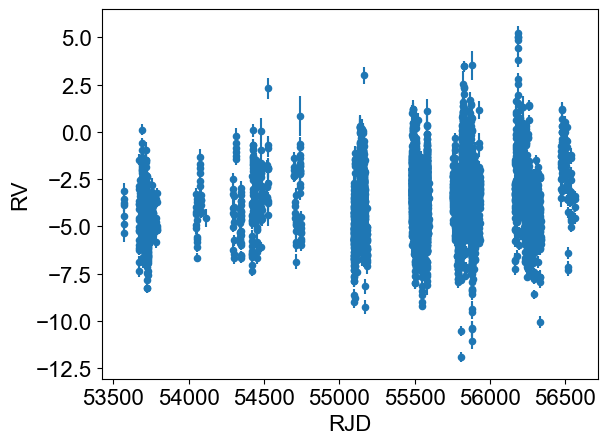

In [6]:
# Scatter plot with errorbars
# There are more points present then before; possibly more data from recent observation?)
data.plot.scatter(x='RJD', y='RV', yerr='e_RV')

## Plotting RV & H$\alpha$

Creating scatterplots of each TimeSeries object. Creating $\Delta t$ histogram of RV ($\Delta t_{i} = t_{i+1} - t_{i}$). Examining the $\Delta t$ histogram can help you choose a sensible Nyquist-like frequency for your periodograms.

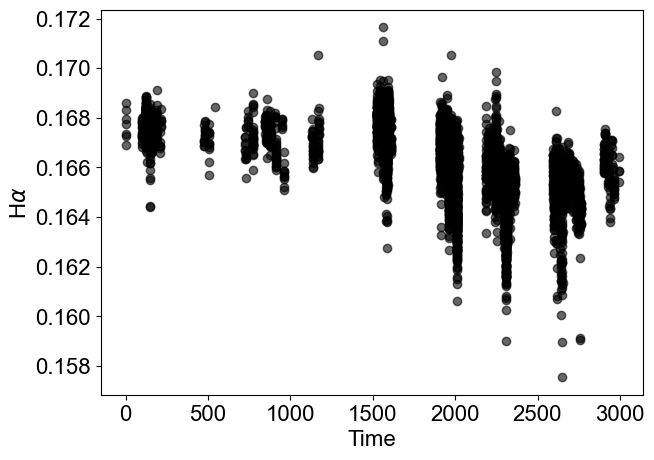

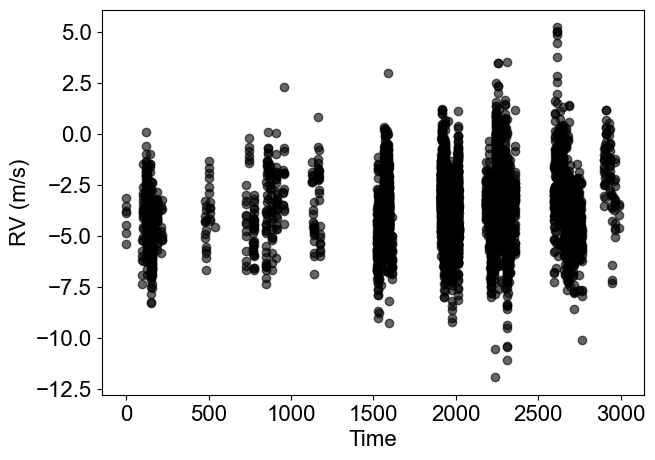

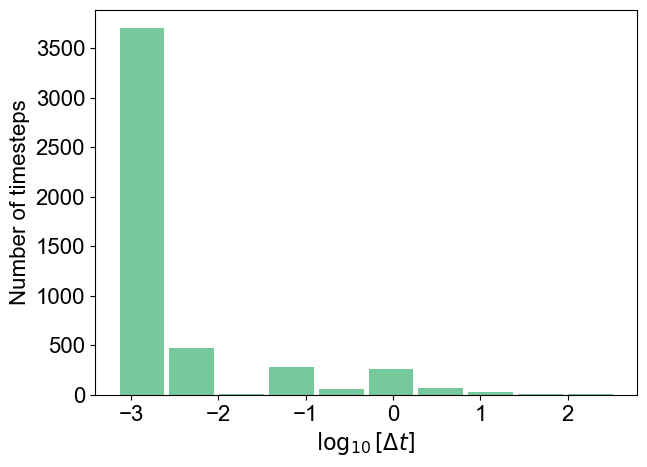

In [7]:
ha.scatterplot(ylabel=r"H$\alpha$")
rv.scatterplot(ylabel="RV (m/s)")
rv.dthist()

### Frequency grid for the Lomb-Scargle periodogram of RV & H$\alpha$

This software separates frequency-grid construction and periodogram calculation into two different functions. This is so the user has to make a conscious decision about which frequencies it makes sense to probe.

Also running the untapered periodgram of a non-uniform fast Fourier Transform for each TimeSeries objects at 1000 bootstrap iterations.

In [8]:
ha.frequency_grid(0.5, 3)
rv.frequency_grid(0.5, 3)

ha.pow_FT(N_bootstrap=1000)
rv.pow_FT(N_bootstrap=1000)

Iteration 0
Iteration 500
Iteration 0
Iteration 500


### Plot the periodograms of RV & H$\alpha$

The vertical lines mark the signals for six different planets, planet b, c, d, e, f, and g. Planets b, d, and e are seen as real signals, while planets c, f, and g are possible planet signals.

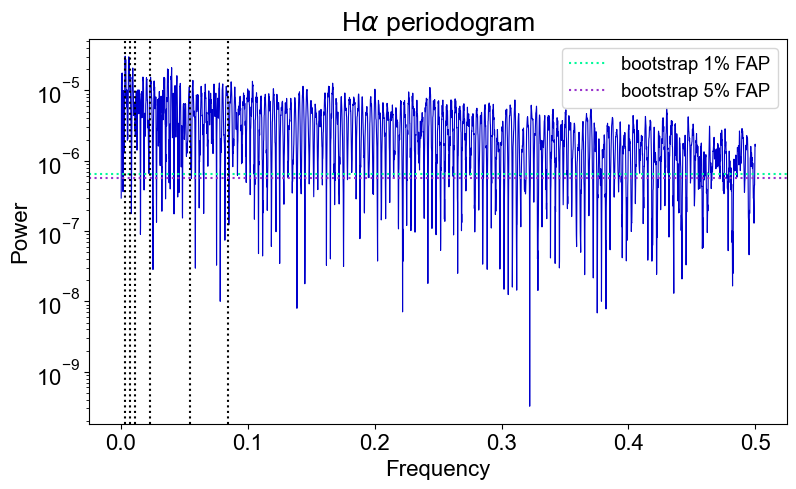

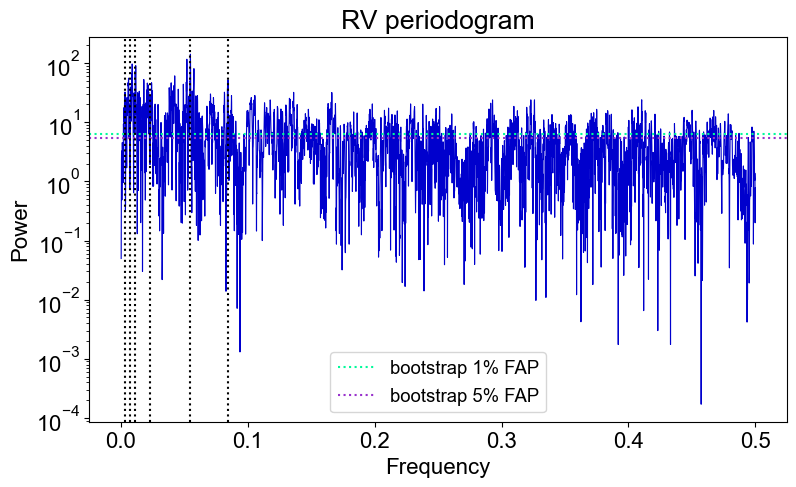

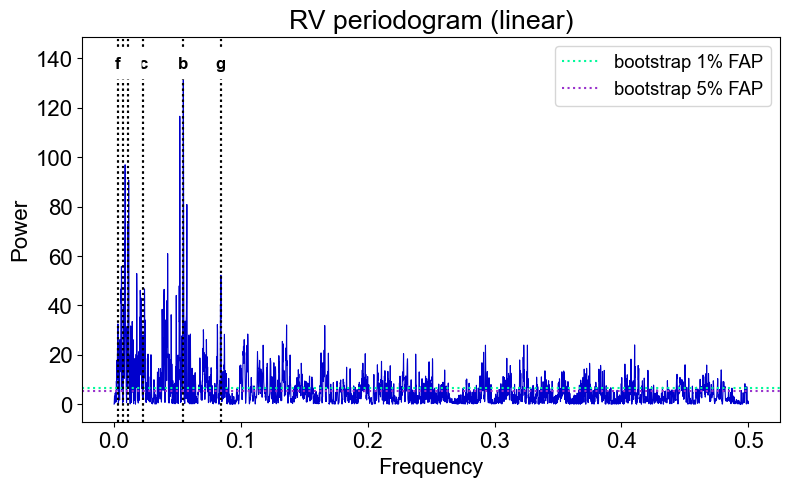

In [42]:
planets = [1/pb, 1/pc, 1/pd, 1/pe, 1/pf, 1/pg]
planet_labels = ['b', 'c', 'd', 'e', 'f', 'g']

ha.powplot(title=r"H$\alpha$ periodogram", vlines=planets)
rv.powplot(title='RV periodogram', vlines=planets)
rv.powplot(title='RV periodogram (linear)', vlines=planets, yscale='linear')          

### Siegel's test for periodicity of RV & H$\alpha$

Here we use the conservative implementation with $\lambda = 0.6$, which is optimized for two periodic signals.

In [10]:
rv.Siegel_test()
ha.Siegel_test()

T statistic: 0.03402
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities
T statistic: 0.00313
T threshold for rejecting white noise hypothesis at 5% level: 0.00235
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities


### Start the coherence analysis of RV & H$\alpha$

We start by creating the Bivariate object, which is defined below.

In [11]:
rv_ha = Bi.Bivariate(data['RJD'].to_numpy(), data['RV'].to_numpy(), data['Halpha'].to_numpy())

Nyquist frequency from mean dt: 0.81561
Nyquist frequency from 10% trimmed mean dt: 15.88007
Nyquist frequency from 20% trimmed mean dt: 90.33436
Nyquist frequency from median dt: 326.79739
Rayleigh resolution: 0.00033


### Set up the Welch's segmenting and tapering scheme from RV & H$\alpha$

This is the segmenting and tapering of RV & H$\alpha$. This gives information on Rayleigh resolution and power spectrum resolution unit, related to the spectral window. Multiple instanes of segmentations and tapering are used to view different distributions of spectral windows. The taper 'BlackmanHarris' is used in segmenting this data to get the bell-shaped figures below. Tapering decreases your spectral resolution but helps to supress variance, which is effective for planet searching.

Number of data points per segment: 3255
Number of segments: 2
Segment start and end points: [[   0 3255]
 [1627 4883]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000074
Minimum 6-dB main lobe half width: 0.001202
Mean 6-dB main lobe half width (1/2 resolution limit): 0.001861
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000442
Number of data points per segment: 3255
Number of segments: 2
Segment start and end points: [[   0 3255]
 [1627 4883]]
Effective number of segments: 1.997116
Frequency grid spacing: 0.000074
Minimum 6-dB main lobe half width: 0.001202
Mean 6-dB main lobe half width (1/2 resolution limit): 0.001861
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000442


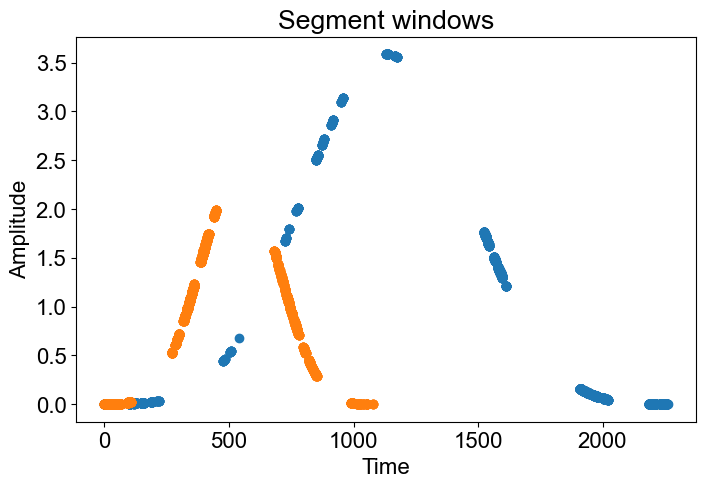

In [12]:
rv_ha.segment_data(2, 0.2, oversample=6, window='BlackmanHarris', plot_windows=True)
#rv_ha.segment_data(3, 0.2, oversample=6, window='BlackmanHarris', plot_windows=True)
#rv_ha.segment_data(4, 0.2, oversample=6, window='BlackmanHarris', plot_windows=True)


#rv_ha.segment_data(2, 0.2, oversample=6, plot_windows=True)
#rv_ha.segment_data(3, 0.2, oversample=6, plot_windows=True)
#rv_ha.segment_data(4, 0.2, oversample=6, plot_windows=True)


# The window is the taper, the first value is the number of segments.
# Create more instances of segmentation and tapering (2, 3, 4 segments; with and without taper).
# Create manual segment boundaries.

### Calculating the RV & H$\alpha$ coherence estimate, Welch's power spectrum estimates, and bootstrap false alarm levels

You would want zero background coherence when computing analytical false alarm levels on coherence stimates. boostrap helps with this, as they act as a fialsafe for when the analytical false alarm levels fail, which doesn't happen very often. In calculating the power spectrum estimates, 10000 iterations are used.

In [13]:
rv_ha.Welch_coherence_powspec()
rv_ha.Welch_coherence_powspec_bootstrap()
# For analytical data, the bootstrap isn't necessary, as it is useful for non-analytical data to estimate the distribution of relevant statistics.

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500

Mean number of false-alarm threshold crossings per Rayleigh resolution from bootstrap simulations:
5% FAP: 0.198
1% FAP: 0.075
0.1% FAP: 0.011

Number of false-alarm threshold crossings per Rayleigh resolution from actual data:
5% FAP: 0.243 crossings =  93.7750 %ile
1% FAP: 0.124 crossings =  99.2450 %ile
0.1% FAP: 0.018 crossings =  93.7750 %ile



### Using Siegel's test on the Welch's power spectrum estimates for RV & H$\alpha$

<tt>Bivariate.Siegel_Welch()<tt> is actually just a wrapper of <tt>TimeSeries.Siegel_test(Welch=True)<tt>.

As expected, the Welch's power spectrum estimates support the hypothesis that both time series are periodic.

In [14]:
rv_ha.Siegel_Welch()

Siegel's test on Sxx:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00339
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
Siegel's test on Syy:
T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00339
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)


### Plotting the magnitude-squared coherence estimate from RV & H$\alpha$

The vertical lines show the stellar signals mentioned before, which are signals for planet b, c, d, e, f, and g.

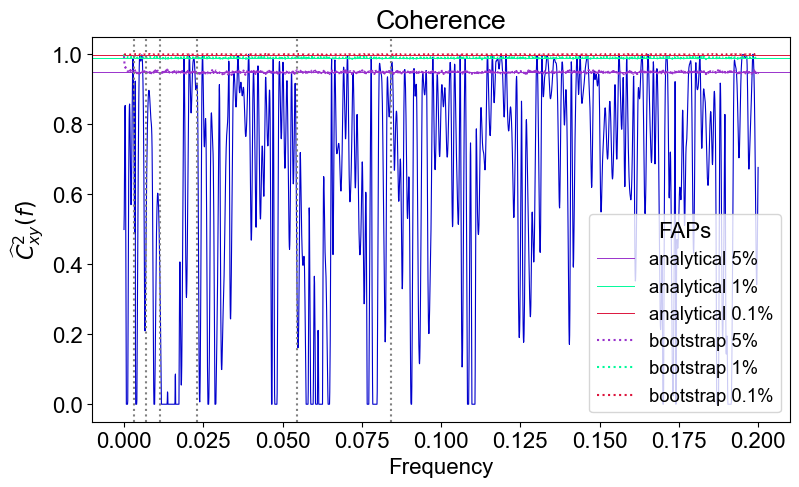

In [15]:
rv_ha.coh_plot(show_theoretical_thresholds=True, vlines=planets)

### Plot the transformed coherence estimate $z(f)$ for RV & H$\alpha$

In this plot of the transformed coherence estimate $z(f)$, we can see the stellar signals mentioned before.

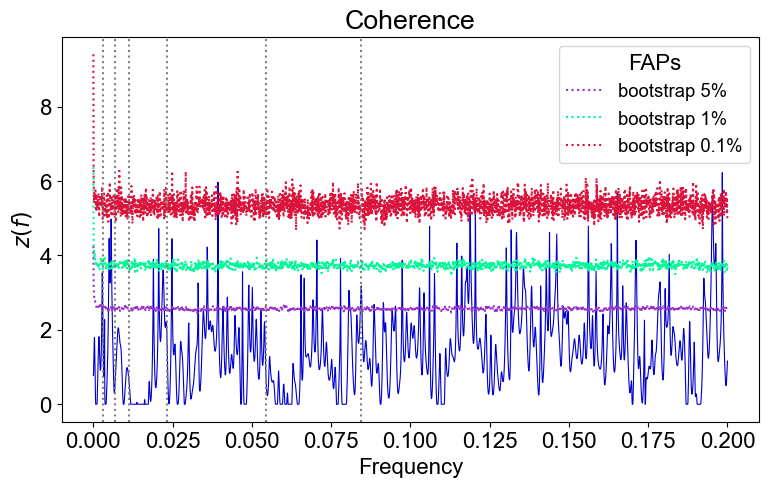

In [16]:
rv_ha.coh_plot(transformed=True, vlines=planets)

### Examine the Welch's spectral window of RV & H$\alpha$

Since <tt>Bivariate</tt> object stores the data in two <tt>TimeSeries</tt> objects, <tt>x_series</tt> and <tt>y_series</tt>, you have access to all the <tt>TimeSeries</tt> methods. Here we use <tt>TimeSeries.spectral_window_Welch()</tt> to sanity-check our Welch's spectral window and make sure it has no huge sidelobes that can easily be misinterpreted as periodic signals.

Half bandwidth: 0.003614
Welch average spectral window not saved to file
Half bandwidth: 0.003614
Welch average spectral window not saved to file


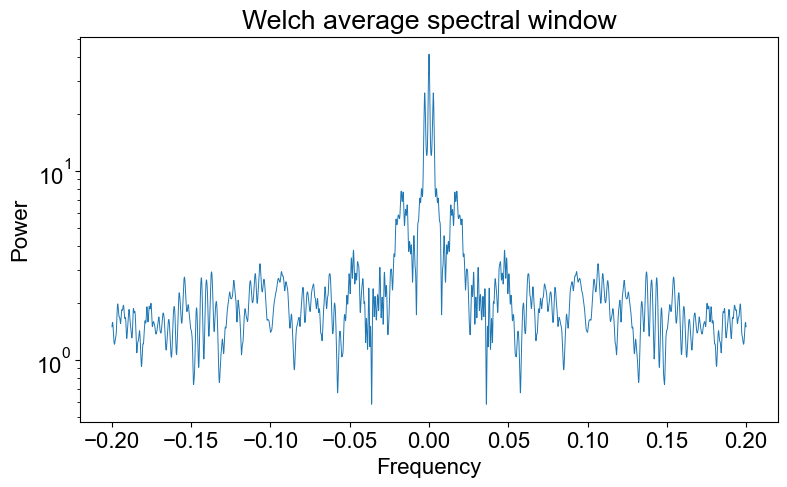

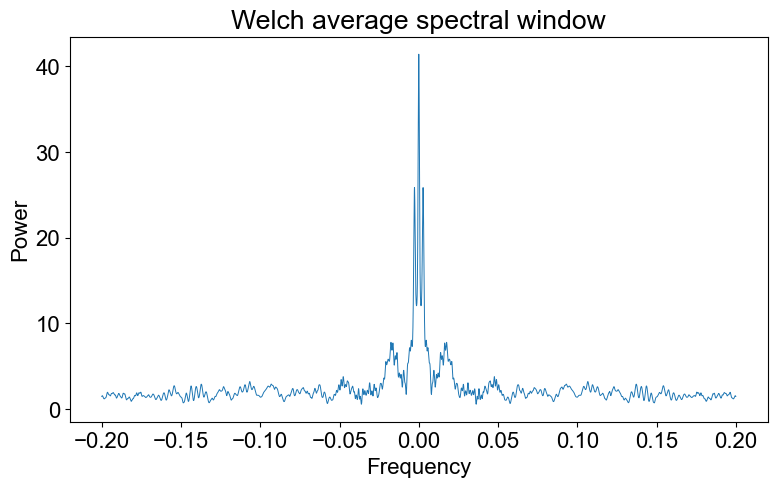

In [17]:
rv_ha.x_series.spectral_window_Welch()
rv_ha.x_series.spectral_window_Welch(yscale='linear')

### Plot both Welch's power spectrum estimates of RV & H$\alpha$

<tt>Bivariate.Welch_pow_plot()</tt> is a wrapper of <tt>TimeSeries.powplot(Welch=True)</tt>. The first plot is of a Welch power plot of RV, while the second plot is of a Welch power plot of H$\alpha$.

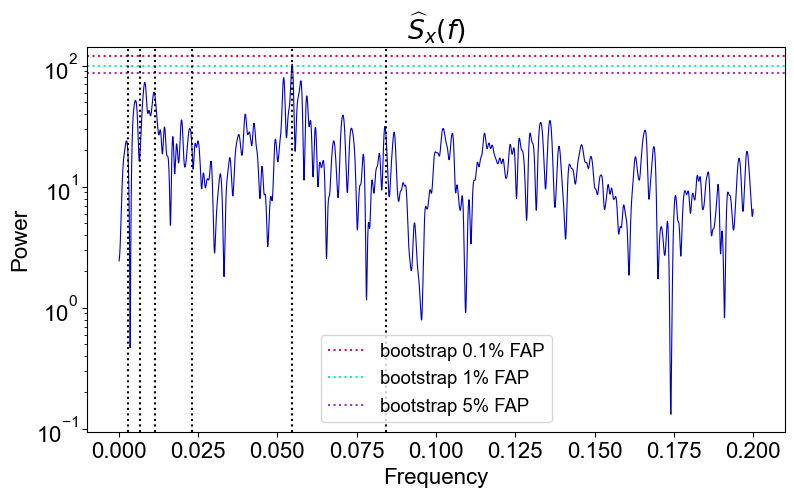

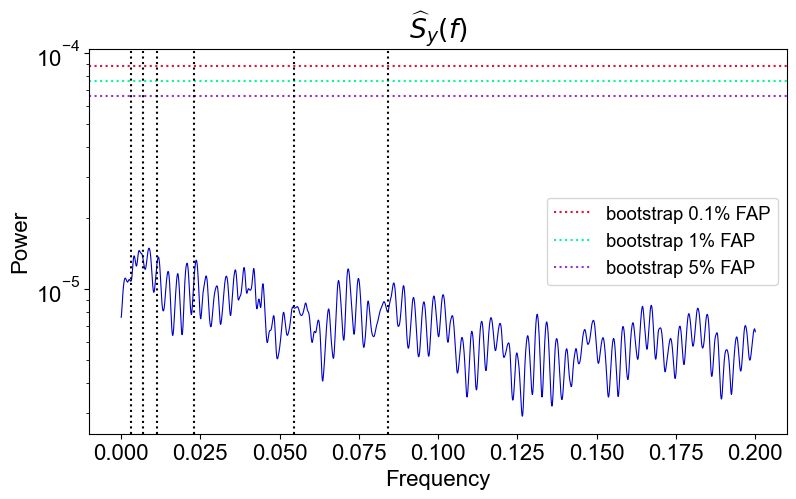

In [18]:
rv_ha.Welch_pow_plot(vlines=planets)
rv_ha.Welch_pow_plot(x_or_y='y', vlines=planets)

### Plot RV power spectrum with a linear y-axis

This plot is similar to $\hat{S}_{x}(f)$, but with a linear y scale. This plot more easily shows the significance around the stellar signals of the planets.

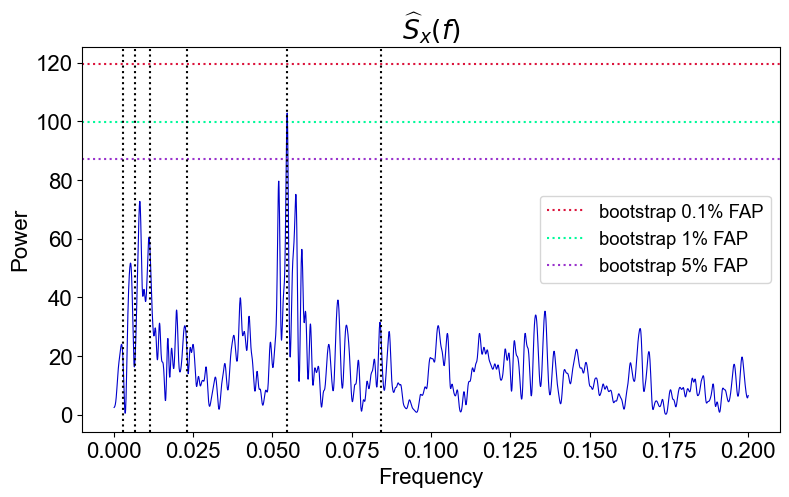

In [19]:
rv_ha.Welch_pow_plot(vlines=planets, yscale='linear')

### Calculate <tt>astropy.timeseries.LombScargle</tt> periodograms from both time series

Here we specify the same frequency grid as in the previous analysis and use the power spectral density normalization so we can compare with the NWelch results, all of which are psd normalized. The zero frequency is responsible for the invalid value warning.

In [20]:
pow_ha = LombScargle(data['RJD'].to_numpy(), data['Halpha'].to_numpy(), normalization='psd').power(rv_ha.pow_coh_grid)
pow_rv = LombScargle(data['RJD'].to_numpy(), data['RV'].to_numpy(), normalization='psd').power(rv_ha.pow_coh_grid)

/Users/andrewandmatthewfonseca/anaconda3/lib/python3.10/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:102: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


### Rotation period measurement
Based on the highest peak in the H$\alpha$ Welch's periodogram, which is statistically significant, we can infer a rotation period. The closes signal to the measured rotation period is planet e, with a period of 88.90 days.

In [21]:
frot_measured = rv_ha.y_series.Welch_powgrid[np.argmax(rv_ha.y_series.Welch_pow)]
print('Measured rotation period:', 1/frot_measured)

Measured rotation period: 113.00000000000018


### Plots of each Welch's periodogram by itself using RV & H$\alpha$

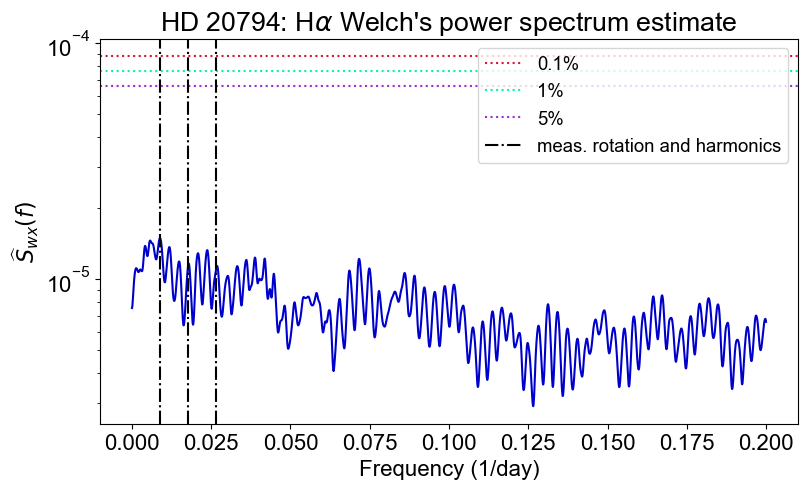

In [22]:
plt.figure(figsize=figsize)
plt.semilogy(rv_ha.pow_coh_grid, rv_ha.y_series.Welch_pow, color='mediumblue')
plt.axhline(rv_ha.ypow_Welch_false_alarm_01, color='crimson', ls=':', label='0.1%')
plt.axhline(rv_ha.ypow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='1%')
plt.axhline(rv_ha.ypow_Welch_false_alarm_5, color='darkorchid', ls=':', label='5%')

for s in [frot_measured, 2*frot_measured]:
    plt.axvline(s, color='k', ls='-.')

plt.axvline(3*frot_measured, color='k', ls='-.', label='meas. rotation and harmonics')
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$\widehat{S}_{wx}(f)$")
plt.title(r"HD 20794: H$\alpha$ Welch's power spectrum estimate")
plt.legend(loc='upper right', fontsize='small')

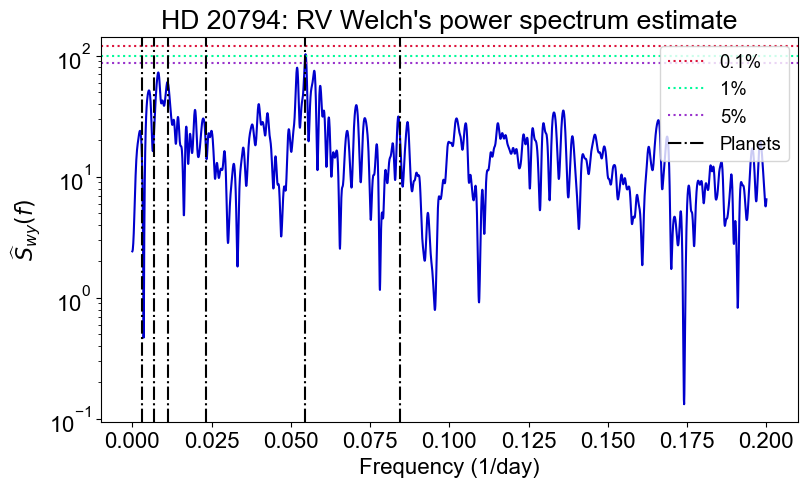

In [23]:
plt.figure(figsize=figsize)
plt.semilogy(rv_ha.pow_coh_grid, rv_ha.x_series.Welch_pow, color='mediumblue')
plt.axhline(rv_ha.xpow_Welch_false_alarm_01, color='crimson', ls=':', label='0.1%')
plt.axhline(rv_ha.xpow_Welch_false_alarm_1, color='mediumspringgreen', ls=':', label='1%')
plt.axhline(rv_ha.xpow_Welch_false_alarm_5, color='darkorchid', ls=':', label='5%')

for n in range(6):
    if n == 0:
        plt.axvline(planets[n], color='k', ls='-.', label='Planets')
    else:
        plt.axvline(planets[n], color='k', ls='-.')
        
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$\widehat{S}_{wy}(f)$")
plt.title(r"HD 20794: RV Welch's power spectrum estimate")
plt.legend(loc='upper right', fontsize='small')

In [51]:
# ASAS-SN Data
asas_sn_data = pd.read_csv('light_curve_a88b1310-e57d-4a47-8804-17d0aac72896.csv', comment='#')
colnames = ['HJD', 'mag']
pd.options.display.float_format = '{:.10f}'.format
asas_sn_data

,HJD,UT_Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
0,2456809.9448099998,2014-06-01.4466576,be,2.0500000000,14.7240000000,12.422,0.0260000000,41.2160000000,1.0010000000,V
1,2456826.9192400002,2014-06-18.4204011,be,1.4500000000,15.6490000000,12.843,0.0170000000,27.9930000000,0.4250000000,V
2,2456826.9207500000,2014-06-18.4219115,be,1.4300000000,15.5260000000,12.547,0.0140000000,36.7290000000,0.4770000000,V
3,2456829.9165300000,2014-06-21.4175543,be,1.5600000000,15.5920000000,12.473,0.0120000000,39.3310000000,0.4500000000,V
4,2456829.9181700000,2014-06-21.4191988,be,1.5600000000,15.7130000000,12.626,0.0130000000,34.1810000000,0.4030000000,V
...,...,...,...,...,...,...,...,...,...,...
5693,2460652.3787300000,2024-12-07.8767532,bo,1.4300000000,14.7440000000,12.617,0.0310000000,32.5990000000,0.9240000000,g
5694,2460652.3799700001,2024-12-07.8779899,bo,1.4300000000,14.6670000000,12.599,0.0330000000,33.1610000000,0.9910000000,g
5695,2460653.5288499999,2024-12-09.0269221,bk,1.6000000000,15.6230000000,13.921,0.0460000000,9.8030000000,0.4100000000,g
5696,2460653.5300900000,2024-12-09.0281616,bk,1.5700000000,15.8280000000,13.942,0.0390000000,9.6230000000,0.3400000000,g


In [52]:
bjd, mag = np.loadtxt(asas_sn_data, unpack=True, usecols=[0, 5])

ValueError: could not convert string 'HJD' to float64 at row 0, column 1.